In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("encoder.csv")

In [3]:
df.head()

,filename,label,text,statutes,charges,facts
0,Delhi_District_Court_2007_2020_2011_1216,0,BRIEF FACTS Adumbrated in brief the prosecutio...,"['IPC Sec 498A', 'IPC Sec 304B', 'IPC Sec 406'...","['Cruelty', 'Dowry Death', 'Criminal Breach of...",['Babita married Rambir Singh according to Hin...
1,Kolkata_HC_1987_173,1,Monoj Kumar J.The appellants before us the sui...,"['Specific Relief Act, 1963 Sec 19']","['Breach of Contract', 'Specific Performance o...",['Respondent 1 agreed to sell suit premises to...
2,Patna_HC_2012_847,1,(Per HONOURABLE MR. JUSTICE AMARESH KUMAR LAL)...,"['IPC Sec 147', 'IPC Sec 148', 'IPC Sec 149', ...","['Murder', 'Rioting armed with deadly weapon',...","['On December 8, 1995, Amit Kumar, Surya Yadav..."
3,Central_Administrative_2012_1470,1,Shri M. L. Chauhan The applicant while working...,"['Regulation 25 of DDA Conduct, Discipline and...","['Misconduct in official duty', 'Negligence in...",['Applicant worked as Junior Engineer in charg...
4,Rajasthan_HC_Jodhpur_2008_2020_2019_2850,1,REPORTABLE on Pronounced on Per Honble Chief J...,"['Article 14 of the Constitution of India', 'A...",['Forgery'],['State invited applications for Safai posts o...


In [5]:
l = []
for i in range(df.shape[0]):
    l.extend(eval(df.loc[i, "statutes"]))
from collections import Counter
d = Counter(l)
d


Counter({'IPC Sec 302': 788,
         'CrPC Sec 313': 577,
         'IPC Sec 34': 521,
         'Consumer Protection Act, 1986': 451,
         'IPC Sec 323': 430,
         'CrPC Sec 482': 407,
         'IPC Sec 307': 337,
         'IPC Sec 420': 331,
         'Constitution of India Art 226': 323,
         'IPC Sec 149': 265,
         'IPC Sec 148': 259,
         'IPC Sec 324': 249,
         'IPC Sec 147': 219,
         'IPC Sec 498A': 203,
         'Constitution of India Article 226': 197,
         'IPC Sec 506': 186,
         'Article 226 of the Constitution of India': 180,
         'IPC Sec 406': 172,
         'IPC Sec 468': 170,
         'CrPC Sec 161': 169,
         'IPC Sec 120B': 168,
         'IPC Sec 471': 167,
         'IPC Sec 341': 153,
         'IPC Sec 376': 150,
         'IPC Sec 120-B': 145,
         'IPC Sec 467': 139,
         'IPC Sec 326': 136,
         'Income Tax Act Sec 143(3)': 132,
         'IPC Sec 201': 132,
         'IPC Sec 379': 130,
         'IPC Sec 279':

In [12]:
top_statutes = [s for s, _ in Counter(l).most_common(10)]
print("Top 10 Statutes:")
for s in top_statutes:
    print(" -", s)

Top 10 Statutes:
 - IPC Sec 302
 - CrPC Sec 313
 - IPC Sec 34
 - Consumer Protection Act, 1986
 - IPC Sec 323
 - CrPC Sec 482
 - IPC Sec 307
 - IPC Sec 420
 - Constitution of India Art 226
 - IPC Sec 149


In [13]:
statute_charge_map = {}

for statute in top_statutes:
    related_charges = []
    for i in range(df.shape[0]):
        case_statutes = eval(df.loc[i, "statutes"])
        if statute in case_statutes:
            related_charges.extend(eval(df.loc[i, "charges"]))
    
    statute_charge_map[statute] = Counter(related_charges)

In [14]:
for statute, charge_counts in statute_charge_map.items():
    print(f"\n📘 {statute} — Total related charges: {sum(charge_counts.values())}")
    for charge, count in charge_counts.most_common(10):
        print(f"   {charge:<40} {count}")


📘 IPC Sec 302 — Total related charges: 2476
   Murder                                   778
   Rioting                                  108
   Attempt to Murder                        96
   Voluntarily causing hurt                 82
   Rioting armed with deadly weapon         67
   Causing disappearance of evidence        56
   Criminal Conspiracy                      46
   Voluntarily causing hurt by dangerous weapons 44
   Attempt to murder                        43
   Cruelty                                  43

📘 CrPC Sec 313 — Total related charges: 1516
   Murder                                   288
   Attempt to Murder                        55
   Voluntarily causing hurt                 47
   Rioting                                  39
   Cruelty                                  37
   Rape                                     36
   Causing disappearance of evidence        28
   Attempt to murder                        28
   Dowry Death                              25
   Kidna

In [15]:
import pandas as pd

# Assuming df already loaded and statutes column has list of strings
top_statutes = [
    'IPC Sec 302',
    'CrPC Sec 313',
    'IPC Sec 34',
    'Consumer Protection Act, 1986',
    'IPC Sec 323',
    'CrPC Sec 482',
    'IPC Sec 307',
    'IPC Sec 420',
    'Constitution of India Art 226',
    'IPC Sec 149'
]

# Create an empty list to store filtered rows
selected_rows = []

# Loop through each top statute
for statute in top_statutes:
    # Filter cases containing this statute
    mask = df['statutes'].apply(lambda x: statute in eval(x))
    subset = df[mask]
    
    # Sample up to 150 rows (if less, take all)
    sample = subset.sample(n=min(150, len(subset)), random_state=42)
    
    # Add to list
    selected_rows.append(sample)

# Concatenate all sampled subsets
final_df = pd.concat(selected_rows).reset_index(drop=True)

# Save to CSV
final_df.to_csv("data.csv", index=False)

print("✅ New dataset created successfully with", len(final_df), "rows.")
final_df['statutes'].apply(lambda x: eval(x)).explode().value_counts().head(15)


✅ New dataset created successfully with 1500 rows.


statutes
IPC Sec 302                      500
IPC Sec 323                      390
IPC Sec 34                       370
IPC Sec 307                      349
CrPC Sec 313                     333
IPC Sec 149                      301
IPC Sec 148                      273
CrPC Sec 482                     271
IPC Sec 147                      223
IPC Sec 324                      218
IPC Sec 420                      207
Constitution of India Art 226    171
Consumer Protection Act, 1986    150
IPC Sec 341                      127
IPC Sec 506                      116
Name: count, dtype: int64

In [16]:
len(d)

27959

In [2]:
import pandas as pd
df1 = pd.read_csv("encoder_top10_balanced_1000.csv")

In [3]:
l = []
for i in range(df1.shape[0]):
    l.extend(eval(df1.loc[i, "statutes"]))
from collections import Counter
d = Counter(l)
d


Counter({'IPC Sec 302': 446,
         'IPC Sec 323': 420,
         'IPC Sec 149': 414,
         'IPC Sec 148': 405,
         'IPC Sec 147': 358,
         'IPC Sec 307': 349,
         'IPC Sec 34': 337,
         'IPC Sec 324': 294,
         'CrPC Sec 313': 265,
         'CrPC Sec 482': 172})

In [4]:
l = []
for i in range(df1.shape[0]):
    l.extend(eval(df1.loc[i, "charges"]))
from collections import Counter
d = Counter(l)
d


Counter({'Murder': 448,
         'Rioting': 370,
         'Voluntarily causing hurt': 292,
         'Rioting armed with deadly weapon': 224,
         'Attempt to Murder': 172,
         'Attempt to murder': 167,
         'Unlawful assembly': 166,
         'Voluntarily causing hurt by dangerous weapons': 126,
         'Voluntarily Causing Hurt': 114,
         'Criminal intimidation': 112,
         'Unlawful Assembly': 99,
         'Voluntarily causing grievous hurt': 87,
         'Wrongful restraint': 67,
         'Criminal Intimidation': 67,
         'Mischief': 60,
         'Wrongful Restraint': 56,
         'Rioting Armed with Deadly Weapon': 52,
         'Criminal Conspiracy': 51,
         'Cruelty': 50,
         'Voluntarily causing grievous hurt by dangerous weapons': 47,
         'Voluntarily Causing Hurt by Dangerous Weapons': 45,
         'Cheating': 43,
         'Culpable homicide not amounting to murder': 38,
         'Theft': 36,
         'Criminal conspiracy': 36,
         '

✅ Dataset loaded: (12747, 6)


,filename,label,text,statutes,charges,facts
0,Delhi_District_Court_2007_2020_2011_1216,0,BRIEF FACTS Adumbrated in brief the prosecutio...,"['IPC Sec 498A', 'IPC Sec 304B', 'IPC Sec 406'...","['Cruelty', 'Dowry Death', 'Criminal Breach of...",['Babita married Rambir Singh according to Hin...
1,Kolkata_HC_1987_173,1,Monoj Kumar J.The appellants before us the sui...,"['Specific Relief Act, 1963 Sec 19']","['Breach of Contract', 'Specific Performance o...",['Respondent 1 agreed to sell suit premises to...



✅ Parsed Example:


,charges,statutes
0,"[Cruelty, Dowry Death, Criminal Breach of Trust]","[IPC Sec 498A, IPC Sec 304B, IPC Sec 406, IPC ..."
1,"[Breach of Contract, Specific Performance of C...","[Specific Relief Act, 1963 Sec 19]"
2,"[Murder, Rioting armed with deadly weapon, Unl...","[IPC Sec 147, IPC Sec 148, IPC Sec 149, IPC Se..."



⚖️ Top 10 Charges:
1. Murder  (934 cases)
2. Deficiency in Service  (746 cases)
3. Cheating  (462 cases)
4. Forgery  (397 cases)
5. Voluntarily causing hurt  (330 cases)
6. Breach of Contract  (320 cases)
7. Cruelty  (316 cases)
8. Rioting  (271 cases)
9. Rash and negligent driving  (248 cases)
10. Criminal Conspiracy  (236 cases)

📊 Statute–Charge Summary:


,Charge,Statute,Count
0,Murder,IPC Sec 302,780
1,Deficiency in Service,Consumer Protection Act,712
2,Cheating,IPC Sec 420,318
3,Forgery,IPC Sec 420,124
4,Voluntarily causing hurt,IPC Sec 323,284
5,Breach of Contract,Arbitration and Conciliation Act,212
6,Cruelty,IPC Sec 498A,152
7,Rioting,IPC Sec 147,203
8,Rash and negligent driving,Motor Vehicles Act,195
9,Criminal Conspiracy,IPC Sec 120B,108


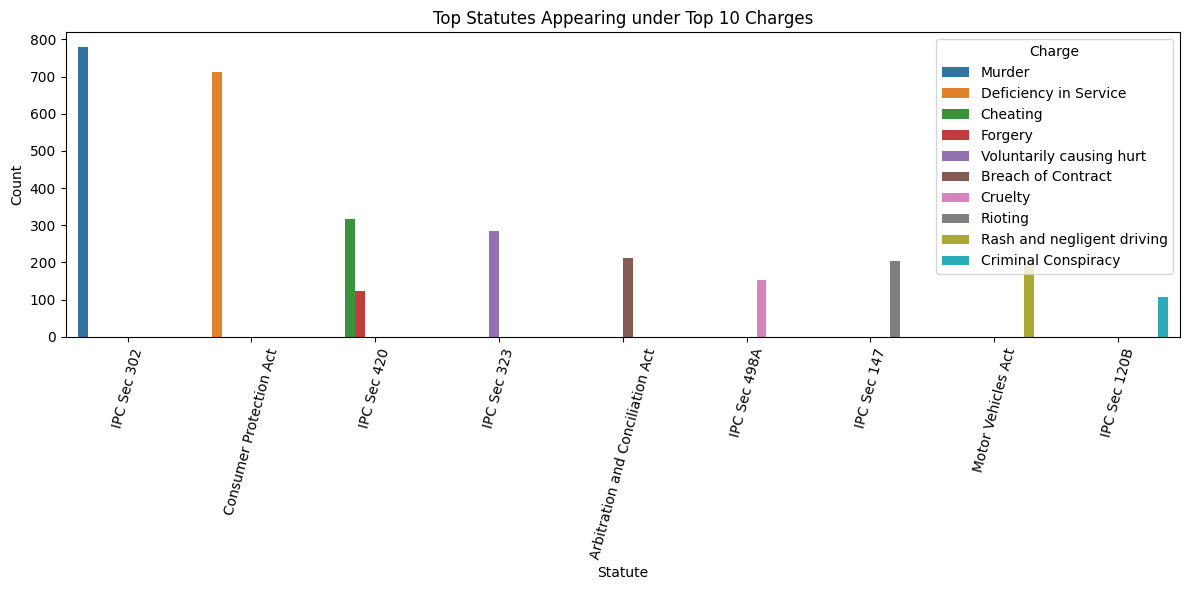


💾 Summary saved to 'charge_statute_summary.csv'


In [4]:
# ===============================================================
# ⚖️ LEGAL DATA EXPLORATION NOTEBOOK
# Works perfectly with stringified list columns like:
# [Cruelty, Dowry Death, Criminal Breach of Trust]
# ===============================================================

import pandas as pd
import re
from collections import Counter
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1️⃣ LOAD DATASET
# ---------------------------------------------------------------
df = pd.read_csv("encoder.csv")
print("✅ Dataset loaded:", df.shape)

# Preview
display(df.head(2))

# ---------------------------------------------------------------
# 2️⃣ PARSE LIST-LIKE STRINGS INTO PYTHON LISTS
# ---------------------------------------------------------------
def parse_list(s):
    """
    Converts strings like:
    [Cruelty, Dowry Death, Criminal Breach of Trust]
    → ['Cruelty', 'Dowry Death', 'Criminal Breach of Trust']
    """
    if pd.isna(s):
        return []
    if isinstance(s, list):
        return s
    # remove square brackets and excessive spaces
    s = re.sub(r'[\[\]]', '', str(s).strip())
    # split by commas with optional spaces
    items = re.split(r'\s*,\s*', s)
    # clean quotes and blanks
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

print("\n✅ Parsed Example:")
display(df[["charges", "statutes"]].head(3))

# ---------------------------------------------------------------
# 3️⃣ FIND TOP 10 CHARGES
# ---------------------------------------------------------------
charge_counts = Counter(chain.from_iterable(df["charges"]))
top_charges = [c for c, _ in charge_counts.most_common(10)]

print("\n⚖️ Top 10 Charges:")
for i, (charge, count) in enumerate(charge_counts.most_common(10), start=1):
    print(f"{i}. {charge}  ({count} cases)")

# ---------------------------------------------------------------
# 4️⃣ FIND STATUTES FREQUENT UNDER EACH TOP CHARGE
# ---------------------------------------------------------------
charge_to_statute_counts = {}
for charge in top_charges:
    sub_df = df[df["charges"].apply(lambda lst: charge in lst)]
    statutes_flat = list(chain.from_iterable(sub_df["statutes"]))
    stat_count = Counter(statutes_flat).most_common(1)
    charge_to_statute_counts[charge] = stat_count

# ---------------------------------------------------------------
# 5️⃣ BUILD SUMMARY DATAFRAME
# ---------------------------------------------------------------
records = []
for charge, stats in charge_to_statute_counts.items():
    for stat, count in stats:
        records.append({"Charge": charge, "Statute": stat, "Count": count})

summary_df = pd.DataFrame(records)
print("\n📊 Statute–Charge Summary:")
display(summary_df.head(20))

# ---------------------------------------------------------------
# 6️⃣ VISUALIZE RELATIONSHIPS (OPTIONAL)
# ---------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=summary_df, x="Statute", y="Count", hue="Charge")
plt.title("Top Statutes Appearing under Top 10 Charges")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 7️⃣ SAVE RESULTS (OPTIONAL)
# ---------------------------------------------------------------
summary_df.to_csv("charge_statute_summary.csv", index=False)
print("\n💾 Summary saved to 'charge_statute_summary.csv'")


In [7]:
# ===============================================================
# ⚖️ FILTERING DATASET TO TOP 10 CHARGES & STATUTES
# ===============================================================

import pandas as pd
import re
from itertools import chain

# ---------------------------------------------------------------
# 1️⃣ LOAD YOUR FULL DATASET
# ---------------------------------------------------------------
df = pd.read_csv("encoder.csv")
print("✅ Original dataset loaded:", df.shape)

# ---------------------------------------------------------------
# 2️⃣ PARSE LIST-LIKE COLUMNS
# ---------------------------------------------------------------
def parse_list(s):
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

print("\n🧾 Example parsed row:")
display(df[["charges", "statutes"]].head(3))

# ---------------------------------------------------------------
# 3️⃣ DEFINE YOUR TOP 10 CHARGES AND STATUTES (from your summary)
# ---------------------------------------------------------------
top_charges = [
    "Murder",
    "Deficiency in Service",
    "Cheating",
    "Forgery",
    "Voluntarily causing hurt",
    "Breach of Contract",
    "Cruelty",
    "Rioting",
    "Rash and negligent driving",
    "Criminal Conspiracy"
]

top_statutes = [
    "IPC Sec 302",
    "Consumer Protection Act",
    "IPC Sec 420",
    "IPC Sec 420",   # appears twice but harmless
    "IPC Sec 323",
    "Arbitration and Conciliation Act",
    "IPC Sec 498A",
    "IPC Sec 147",
    "Motor Vehicles Act",
    "IPC Sec 120B"
]
top_statutes = list(set(top_statutes))  # deduplicate

print("\n⚖️ Top 10 Charges:", top_charges)
print("📚 Top Statutes:", top_statutes)

# ---------------------------------------------------------------
# 4️⃣ FILTER DATASET — KEEP ONLY ROWS CONTAINING THESE
# ---------------------------------------------------------------
def keep_case(row):
    has_charge = any(c in top_charges for c in row["charges"])
    has_statute = any(s in top_statutes for s in row["statutes"])
    return has_charge or has_statute

df_filtered = df[df.apply(keep_case, axis=1)].reset_index(drop=True)
print("\n✅ Filtered dataset shape:", df_filtered.shape)

# ---------------------------------------------------------------
# 5️⃣ REMOVE UNWANTED CHARGES/STATUTES FROM EACH ROW
# ---------------------------------------------------------------
def clean_list(lst, allowed):
    return [x for x in lst if x in allowed]

df_filtered["charges"] = df_filtered["charges"].apply(lambda x: clean_list(x, top_charges))
df_filtered["statutes"] = df_filtered["statutes"].apply(lambda x: clean_list(x, top_statutes))

# ---------------------------------------------------------------
# 6️⃣ CHECK FOR EXTRA VALUES (sanity check)
# ---------------------------------------------------------------
unique_charges = sorted(set(chain.from_iterable(df_filtered["charges"])))
unique_statutes = sorted(set(chain.from_iterable(df_filtered["statutes"])))

print("\n🎯 Unique charges present after filtering:", unique_charges)
print("🎯 Unique statutes present after filtering:", unique_statutes)

# ---------------------------------------------------------------
# 7️⃣ SHOW COUNT SUMMARY
# ---------------------------------------------------------------
charge_counts = pd.Series(chain.from_iterable(df_filtered["charges"])).value_counts()
statute_counts = pd.Series(chain.from_iterable(df_filtered["statutes"])).value_counts()

print("\n📊 Count of cases by charge:")
display(charge_counts.to_frame("Count"))

print("\n📊 Count of cases by statute:")
display(statute_counts.to_frame("Count"))

# ---------------------------------------------------------------
# 8️⃣ SAVE FINAL CLEAN DATASET
# ---------------------------------------------------------------
df_filtered.to_csv("encoder_top10.csv", index=False)
print("\n💾 Saved filtered dataset as 'encoder_top10.csv'")


✅ Original dataset loaded: (12747, 6)

🧾 Example parsed row:


,charges,statutes
0,"[Cruelty, Dowry Death, Criminal Breach of Trust]","[IPC Sec 498A, IPC Sec 304B, IPC Sec 406, IPC ..."
1,"[Breach of Contract, Specific Performance of C...","[Specific Relief Act, 1963 Sec 19]"
2,"[Murder, Rioting armed with deadly weapon, Unl...","[IPC Sec 147, IPC Sec 148, IPC Sec 149, IPC Se..."



⚖️ Top 10 Charges: ['Murder', 'Deficiency in Service', 'Cheating', 'Forgery', 'Voluntarily causing hurt', 'Breach of Contract', 'Cruelty', 'Rioting', 'Rash and negligent driving', 'Criminal Conspiracy']
📚 Top Statutes: ['IPC Sec 498A', 'Motor Vehicles Act', 'IPC Sec 323', 'IPC Sec 420', 'Consumer Protection Act', 'IPC Sec 120B', 'IPC Sec 302', 'IPC Sec 147', 'Arbitration and Conciliation Act']

✅ Filtered dataset shape: (4067, 6)

🎯 Unique charges present after filtering: ['Breach of Contract', 'Cheating', 'Criminal Conspiracy', 'Cruelty', 'Deficiency in Service', 'Forgery', 'Murder', 'Rash and negligent driving', 'Rioting', 'Voluntarily causing hurt']
🎯 Unique statutes present after filtering: ['Arbitration and Conciliation Act', 'Consumer Protection Act', 'IPC Sec 120B', 'IPC Sec 147', 'IPC Sec 302', 'IPC Sec 323', 'IPC Sec 420', 'IPC Sec 498A', 'Motor Vehicles Act']

📊 Count of cases by charge:


,Count
Murder,934
Deficiency in Service,746
Cheating,462
Forgery,397
Voluntarily causing hurt,330
Breach of Contract,320
Cruelty,316
Rioting,271
Rash and negligent driving,248
Criminal Conspiracy,236



📊 Count of cases by statute:


,Count
Consumer Protection Act,911
IPC Sec 302,788
Motor Vehicles Act,683
IPC Sec 323,430
Arbitration and Conciliation Act,377
IPC Sec 420,331
IPC Sec 147,219
IPC Sec 498A,203
IPC Sec 120B,168



💾 Saved filtered dataset as 'encoder_top10.csv'


In [8]:
# ===============================================================
# ⚖️ LIST ALL UNIQUE CHARGES AND STATUTES IN FILTERED DATASET
# ===============================================================

import pandas as pd
import re
from itertools import chain

# ---------------------------------------------------------------
# 1️⃣ LOAD THE FILTERED DATASET
# ---------------------------------------------------------------
df = pd.read_csv("encoder_top10.csv")
print("✅ Loaded filtered dataset:", df.shape)

# ---------------------------------------------------------------
# 2️⃣ PARSE LIST-LIKE STRINGS (if needed)
# ---------------------------------------------------------------
def parse_list(s):
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

# ---------------------------------------------------------------
# 3️⃣ EXTRACT UNIQUE CHARGES & STATUTES
# ---------------------------------------------------------------
unique_charges = sorted(set(chain.from_iterable(df["charges"])))
unique_statutes = sorted(set(chain.from_iterable(df["statutes"])))

# ---------------------------------------------------------------
# 4️⃣ DISPLAY RESULTS
# ---------------------------------------------------------------
print("\n⚖️ Unique Charges (" + str(len(unique_charges)) + "):")
for c in unique_charges:
    print(" -", c)

print("\n📚 Unique Statutes (" + str(len(unique_statutes)) + "):")
for s in unique_statutes:
    print(" -", s)

# ---------------------------------------------------------------
# 5️⃣ OPTIONAL — SAVE TO TEXT FILES
# ---------------------------------------------------------------
with open("unique_charges.txt", "w") as f:
    for c in unique_charges:
        f.write(c + "\n")

with open("unique_statutes.txt", "w") as f:
    for s in unique_statutes:
        f.write(s + "\n")

print("\n💾 Saved lists to 'unique_charges.txt' and 'unique_statutes.txt'")


✅ Loaded filtered dataset: (4067, 6)

⚖️ Unique Charges (10):
 - Breach of Contract
 - Cheating
 - Criminal Conspiracy
 - Cruelty
 - Deficiency in Service
 - Forgery
 - Murder
 - Rash and negligent driving
 - Rioting
 - Voluntarily causing hurt

📚 Unique Statutes (9):
 - Arbitration and Conciliation Act
 - Consumer Protection Act
 - IPC Sec 120B
 - IPC Sec 147
 - IPC Sec 302
 - IPC Sec 323
 - IPC Sec 420
 - IPC Sec 498A
 - Motor Vehicles Act

💾 Saved lists to 'unique_charges.txt' and 'unique_statutes.txt'


In [2]:
# ===============================================================
# ⚖️ BALANCED SAMPLING: 1500 CASES (9 CHARGES × 9 STATUTES)
# ===============================================================

import pandas as pd
import numpy as np
import re# ===============================================================
# ⚖️ COUNT UNIQUE CHARGES AND STATUTES IN DATASET
# ===============================================================

import pandas as pd
import re
from itertools import chain
from collections import Counter

# ---------------------------------------------------------------
# 1️⃣ LOAD DATASET
# ---------------------------------------------------------------
df = pd.read_csv("dataset.csv")
print("✅ Dataset loaded:", df.shape)

# ---------------------------------------------------------------
# 2️⃣ PARSE LIST-LIKE STRINGS
# ---------------------------------------------------------------
def parse_list(s):
    """Handles both [A, B, C] and ['A','B','C'] formats safely."""
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())         # remove brackets
    items = re.split(r'\s*,\s*', s)                   # split by commas
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

print("\n🧾 Example parsed row:")
display(df[["charges", "statutes"]].head(3))

# ---------------------------------------------------------------
# 3️⃣ COUNT UNIQUE CHARGES & STATUTES
# ---------------------------------------------------------------
charge_counts = Counter(chain.from_iterable(df["charges"]))
statute_counts = Counter(chain.from_iterable(df["statutes"]))

# Convert to DataFrames for nicer display
charge_df = pd.DataFrame.from_dict(charge_counts, orient="index", columns=["Count"]).sort_values(by="Count", ascending=False)
statute_df = pd.DataFrame.from_dict(statute_counts, orient="index", columns=["Count"]).sort_values(by="Count", ascending=False)

# ---------------------------------------------------------------
# 4️⃣ DISPLAY RESULTS
# ---------------------------------------------------------------
print("\n⚖️ Count of unique CHARGES:")
display(charge_df)

print("\n📚 Count of unique STATUTES:")
display(statute_df)

# ---------------------------------------------------------------
# 5️⃣ (Optional) SAVE TO CSV
# ---------------------------------------------------------------
charge_df.to_csv("unique_charge_counts.csv")
statute_df.to_csv("unique_statute_counts.csv")

print("\n💾 Saved as 'unique_charge_counts.csv' and 'unique_statute_counts.csv'")

from itertools import chain

# ---------------------------------------------------------------
# 1️⃣ LOAD DATASET
# ---------------------------------------------------------------
df = pd.read_csv("dataset.csv")
print("✅ Loaded dataset:", df.shape)

# ---------------------------------------------------------------
# 2️⃣ PARSE LIST-LIKE COLUMNS
# ---------------------------------------------------------------
def parse_list(s):
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

# ---------------------------------------------------------------
# 3️⃣ REMOVE "CHEATING" COMPLETELY
# ---------------------------------------------------------------
df = df[~df["charges"].apply(lambda lst: "Cheating" in lst)].reset_index(drop=True)
print("🚫 Removed cases with charge 'Cheating'")
print("Remaining:", df.shape)

# ---------------------------------------------------------------
# 4️⃣ IDENTIFY UNIQUE CHARGES AND STATUTES
# ---------------------------------------------------------------
unique_charges = sorted(set(chain.from_iterable(df["charges"])))
unique_statutes = sorted(set(chain.from_iterable(df["statutes"])))

print("\n⚖️ Charges present:", unique_charges)
print("📚 Statutes present:", unique_statutes)

# ---------------------------------------------------------------
# 5️⃣ DETERMINE 9 CHARGES AND 9 STATUTES
# (If more than 9 exist, pick top 9 by frequency)
# ---------------------------------------------------------------
charge_counts = pd.Series(chain.from_iterable(df["charges"])).value_counts()
statute_counts = pd.Series(chain.from_iterable(df["statutes"])).value_counts()

top_charges = charge_counts.head(9).index.tolist()
top_statutes = statute_counts.head(9).index.tolist()

print("\n✅ Selected 9 Charges:", top_charges)
print("✅ Selected 9 Statutes:", top_statutes)

# ---------------------------------------------------------------
# 6️⃣ FILTER ONLY THESE CHARGES & STATUTES
# ---------------------------------------------------------------
def clean_list(lst, allowed):
    return [x for x in lst if x in allowed]

df["charges"] = df["charges"].apply(lambda x: clean_list(x, top_charges))
df["statutes"] = df["statutes"].apply(lambda x: clean_list(x, top_statutes))

# Keep only rows that have at least one allowed charge/statute
df = df[df["charges"].map(len) > 0]
df = df[df["statutes"].map(len) > 0]
df = df.reset_index(drop=True)
print("📉 Filtered dataset:", df.shape)

# ---------------------------------------------------------------
# 7️⃣ EQUAL SAMPLING — ~1500 CASES TOTAL
# ---------------------------------------------------------------
# Determine per-class count
samples_per_charge = 1500 // len(top_charges)
print(f"\n🎯 Target samples per charge: {samples_per_charge}")

balanced_samples = []
for charge in top_charges:
    sub_df = df[df["charges"].apply(lambda lst: charge in lst)]
    n = min(samples_per_charge, len(sub_df))
    balanced_samples.append(sub_df.sample(n=n, random_state=42))

df_balanced = pd.concat(balanced_samples).sample(frac=1, random_state=42).reset_index(drop=True)
print("✅ Balanced dataset:", df_balanced.shape)

# ---------------------------------------------------------------
# 8️⃣ VERIFY BALANCE
# ---------------------------------------------------------------
charge_counts_bal = pd.Series(chain.from_iterable(df_balanced["charges"])).value_counts()
statute_counts_bal = pd.Series(chain.from_iterable(df_balanced["statutes"])).value_counts()

print("\n📊 Final charge distribution:")
display(charge_counts_bal.to_frame("Count"))

print("\n📊 Final statute distribution:")
display(statute_counts_bal.to_frame("Count"))

# ---------------------------------------------------------------
# 9️⃣ SAVE FINAL 1500-CASE DATASET
# ---------------------------------------------------------------
df_balanced.to_csv("dataset_balanced_1500.csv", index=False)
print("\n💾 Saved balanced dataset → 'dataset_balanced_1500.csv'")


✅ Dataset loaded: (4067, 6)

🧾 Example parsed row:


,charges,statutes
0,[Cruelty],[IPC Sec 498A]
1,[Breach of Contract],[]
2,[Murder],"[IPC Sec 147, IPC Sec 302]"



⚖️ Count of unique CHARGES:


,Count
Murder,934
Deficiency in Service,746
Cheating,462
Forgery,397
Voluntarily causing hurt,330
Breach of Contract,320
Cruelty,316
Rioting,271
Rash and negligent driving,248
Criminal Conspiracy,236



📚 Count of unique STATUTES:


,Count
Consumer Protection Act,911
IPC Sec 302,788
Motor Vehicles Act,683
IPC Sec 323,430
Arbitration and Conciliation Act,377
IPC Sec 420,331
IPC Sec 147,219
IPC Sec 498A,203
IPC Sec 120B,168



💾 Saved as 'unique_charge_counts.csv' and 'unique_statute_counts.csv'
✅ Loaded dataset: (4067, 6)
🚫 Removed cases with charge 'Cheating'
Remaining: (3605, 6)

⚖️ Charges present: ['Breach of Contract', 'Criminal Conspiracy', 'Cruelty', 'Deficiency in Service', 'Forgery', 'Murder', 'Rash and negligent driving', 'Rioting', 'Voluntarily causing hurt']
📚 Statutes present: ['Arbitration and Conciliation Act', 'Consumer Protection Act', 'IPC Sec 120B', 'IPC Sec 147', 'IPC Sec 302', 'IPC Sec 323', 'IPC Sec 420', 'IPC Sec 498A', 'Motor Vehicles Act']

✅ Selected 9 Charges: ['Murder', 'Deficiency in Service', 'Voluntarily causing hurt', 'Breach of Contract', 'Cruelty', 'Rioting', 'Rash and negligent driving', 'Forgery', 'Criminal Conspiracy']
✅ Selected 9 Statutes: ['Consumer Protection Act', 'IPC Sec 302', 'Motor Vehicles Act', 'IPC Sec 323', 'Arbitration and Conciliation Act', 'IPC Sec 147', 'IPC Sec 498A', 'IPC Sec 120B', 'IPC Sec 420']
📉 Filtered dataset: (2044, 6)

🎯 Target samples per ch

,Count
Murder,393
Rioting,257
Voluntarily causing hurt,245
Deficiency in Service,196
Cruelty,183
Criminal Conspiracy,118
Rash and negligent driving,117
Breach of Contract,109
Forgery,37



📊 Final statute distribution:


,Count
IPC Sec 302,374
IPC Sec 323,303
Consumer Protection Act,244
Arbitration and Conciliation Act,222
IPC Sec 147,220
Motor Vehicles Act,200
IPC Sec 498A,165
IPC Sec 120B,94
IPC Sec 420,6



💾 Saved balanced dataset → 'dataset_balanced_1500.csv'


In [4]:
# ===============================================================
# ⚖️ BALANCE DATASET BY STATUTE (166 CASES EACH)
# ===============================================================

import pandas as pd
import re
from itertools import chain

# ---------------------------------------------------------------
# 1️⃣ LOAD AND CLEAN
# ---------------------------------------------------------------
df = pd.read_csv("dataset.csv")
print("✅ Loaded dataset:", df.shape)

def parse_list(s):
    if pd.isna(s): 
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    items = [x.strip(" '\"") for x in items if x.strip()]
    return items

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

# ---------------------------------------------------------------
# 2️⃣ DEFINE TARGET STATUTES (the 9 you showed)
# ---------------------------------------------------------------
target_statutes = [
    "Consumer Protection Act",
    "IPC Sec 302",
    "Motor Vehicles Act",
    "IPC Sec 323",
    "Arbitration and Conciliation Act",
    "IPC Sec 420",
    "IPC Sec 147",
    "IPC Sec 498A",
    "IPC Sec 120B"
]

df = df[df["statutes"].apply(lambda lst: any(s in target_statutes for s in lst))]
print("✅ Filtered only 9 target statutes:", df.shape)

# ---------------------------------------------------------------
# 3️⃣ SAMPLE 166 CASES PER STATUTE
# ---------------------------------------------------------------
samples_per_statute = 166
balanced_dfs = []

for statute in target_statutes:
    subset = df[df["statutes"].apply(lambda lst: statute in lst)]
    n = min(samples_per_statute, len(subset))
    if n == 0:
        print(f"⚠️ Skipping {statute} (no cases found)")
        continue
    sampled = subset.sample(n=n, replace=(len(subset) < samples_per_statute), random_state=42)
    balanced_dfs.append(sampled)

df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)
print("\n✅ Final balanced dataset shape:", df_balanced.shape)

# ---------------------------------------------------------------
# 4️⃣ VERIFY NEW DISTRIBUTION
# ---------------------------------------------------------------
from collections import Counter

statute_counts = Counter(chain.from_iterable(df_balanced["statutes"]))
print("\n📊 Final Statute Distribution (should be ~166 each):")
for k, v in statute_counts.items():
    print(f"{k:35s} : {v}")

statute_counts = Counter(chain.from_iterable(df_balanced["charges"]))
print("\n📊 Final Statute Distribution (should be ~166 each):")
for k, v in statute_counts.items():
    print(f"{k:35s} : {v}")

# ---------------------------------------------------------------
# 5️⃣ SAVE THE BALANCED DATASET
# ---------------------------------------------------------------
df_balanced.to_csv("dataset_balanced_by_statute_9x166.csv", index=False)
print("\n💾 Saved → 'dataset_balanced_by_statute_9x166.csv'")


✅ Loaded dataset: (4067, 6)
✅ Filtered only 9 target statutes: (2939, 6)

✅ Final balanced dataset shape: (1454, 6)

📊 Final Statute Distribution (should be ~166 each):
Motor Vehicles Act                  : 278
IPC Sec 498A                        : 190
IPC Sec 147                         : 245
IPC Sec 323                         : 315
IPC Sec 302                         : 370
IPC Sec 420                         : 239
Consumer Protection Act             : 192
Arbitration and Conciliation Act    : 341
IPC Sec 120B                        : 215

📊 Final Statute Distribution (should be ~166 each):
Rash and negligent driving          : 56
Cruelty                             : 143
Rioting                             : 237
Voluntarily causing hurt            : 208
Murder                              : 376
Cheating                            : 236
Forgery                             : 114
Deficiency in Service               : 139
Breach of Contract                  : 83
Criminal Conspiracy     

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
statute_counts = Counter(chain.from_iterable(df["statutes"]))
print("\n📊 Final Statute Distribution (should be ~166 each):")
for k, v in statute_counts.items():
    print(f"{k:35s} : {v}")

statute_counts = Counter(chain.from_iterable(df["charges"]))
print("\n📊 Final Statute Distribution (should be ~166 each):")
for k, v in statute_counts.items():
    print(f"{k:35s} : {v}")



📊 Final Statute Distribution (should be ~166 each):
[                                   : 4067
'                                   : 8220
I                                   : 2139
P                                   : 3050
C                                   : 3427
                                    : 9768
S                                   : 2139
e                                   : 5327
c                                   : 6081
4                                   : 753
9                                   : 203
8                                   : 203
A                                   : 2551
]                                   : 4067
1                                   : 387
7                                   : 219
,                                   : 1171
3                                   : 1648
0                                   : 1287
2                                   : 1717
r                                   : 3259
b                                   : 377
i      

In [7]:
# ===============================================================
# ⚖️ STATUTE AND CHARGE DISTRIBUTION IN DATASET
# ===============================================================

import pandas as pd
import re
from itertools import chain
from collections import Counter

# ---------------------------------------------------------------
# 1️⃣ LOAD THE DATASET
# ---------------------------------------------------------------
df = pd.read_csv("dataset.csv")
print("✅ Dataset loaded:", df.shape)

# ---------------------------------------------------------------
# 2️⃣ PARSE STRINGIFIED LISTS (like [Murder, Theft])
# ---------------------------------------------------------------
def parse_list(s):
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    return [x.strip(" '\"") for x in items if x.strip()]

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

# ---------------------------------------------------------------
# 3️⃣ COUNT UNIQUE CHARGES & STATUTES
# ---------------------------------------------------------------
charge_counts = Counter(chain.from_iterable(df["charges"]))
statute_counts = Counter(chain.from_iterable(df["statutes"]))

charge_df = pd.DataFrame.from_dict(charge_counts, orient="index", columns=["Count"]).sort_values(by="Count", ascending=False)
statute_df = pd.DataFrame.from_dict(statute_counts, orient="index", columns=["Count"]).sort_values(by="Count", ascending=False)

# ---------------------------------------------------------------
# 4️⃣ DISPLAY DISTRIBUTION
# ---------------------------------------------------------------
print("\n⚖️ CHARGE DISTRIBUTION:")
display(charge_df)

print("\n📚 STATUTE DISTRIBUTION:")
display(statute_df)

# ---------------------------------------------------------------
# 5️⃣ (Optional) SAVE AS CSV
# ---------------------------------------------------------------
charge_df.to_csv("charge_distribution.csv")
statute_df.to_csv("statute_distribution.csv")

print("\n💾 Saved to 'charge_distribution.csv' and 'statute_distribution.csv'")


✅ Dataset loaded: (4067, 6)

⚖️ CHARGE DISTRIBUTION:


,Count
Murder,934
Deficiency in Service,746
Cheating,462
Forgery,397
Voluntarily causing hurt,330
Breach of Contract,320
Cruelty,316
Rioting,271
Rash and negligent driving,248
Criminal Conspiracy,236



📚 STATUTE DISTRIBUTION:


,Count
Consumer Protection Act,911
IPC Sec 302,788
Motor Vehicles Act,683
IPC Sec 323,430
Arbitration and Conciliation Act,377
IPC Sec 420,331
IPC Sec 147,219
IPC Sec 498A,203
IPC Sec 120B,168



💾 Saved to 'charge_distribution.csv' and 'statute_distribution.csv'


In [10]:
# ===============================================================
# ⚖️ BALANCE DATASET BY STATUTE (150 EACH, KEEP CHEATING)
# ===============================================================

import pandas as pd
import re
from itertools import chain
from collections import Counter

# ---------------------------
# 1. LOAD & CLEAN
# ---------------------------
df = pd.read_csv("dataset.csv")
print("✅ Loaded dataset:", df.shape)

def parse_list(s):
    if pd.isna(s):
        return []
    s = re.sub(r'[\[\]]', '', str(s).strip())
    items = re.split(r'\s*,\s*', s)
    return [x.strip(" '\"") for x in items if x.strip()]

df["charges"] = df["charges"].apply(parse_list)
df["statutes"] = df["statutes"].apply(parse_list)

# ---------------------------
# 2. DEFINE TARGET STATUTES (YOUR 10 MAIN ONES)
# ---------------------------
target_statutes = [
    "Consumer Protection Act",
    "IPC Sec 302",
    "Motor Vehicles Act",
    "IPC Sec 323",
    "Arbitration and Conciliation Act",
    "IPC Sec 420",
    "IPC Sec 147",
    "IPC Sec 498A",
    "IPC Sec 120B",
    # Cheating uses IPC Sec 420 but we keep it via statute itself
]

# ---------------------------
# 3. SAMPLE ~150 PER STATUTE
# ---------------------------
samples_per_statute = 150
balanced_parts = []

for statute in target_statutes:
    subset = df[df["statutes"].apply(lambda lst: statute in lst)]
    if len(subset) == 0:
        print(f"⚠️ No cases found for {statute}")
        continue
    n = min(samples_per_statute, len(subset))
    sampled = subset.sample(
        n=n,
        replace=(len(subset) < samples_per_statute),
        random_state=42
    )
    balanced_parts.append(sampled)

# ---------------------------
# 4. DEDUPLICATE SAFELY
# ---------------------------
df_tmp = pd.concat(balanced_parts).copy()
# make list columns hashable
df_tmp["charges"] = df_tmp["charges"].apply(tuple)
df_tmp["statutes"] = df_tmp["statutes"].apply(tuple)

df_balanced = (
    df_tmp
    .drop_duplicates()
    .sample(frac=1, random_state=42)
    .reset_index(drop=True)
)

# convert back to list format
df_balanced["charges"] = df_balanced["charges"].apply(list)
df_balanced["statutes"] = df_balanced["statutes"].apply(list)

print(f"\n✅ Final dataset shape: {df_balanced.shape}")

# ---------------------------
# 5. VERIFY DISTRIBUTION
# ---------------------------
statute_counts = Counter(chain.from_iterable(df_balanced["statutes"]))
charge_counts = Counter(chain.from_iterable(df_balanced["charges"]))

print("\n📚 Final Statute Distribution:")
for k,v in statute_counts.items():
    print(f"{k:35s} : {v}")

print("\n⚖️ Final Charge Distribution (approx; multi-label cases may cause overlap):")
for k,v in charge_counts.items():
    print(f"{k:35s} : {v}")

# ---------------------------
# 6. SAVE
# ---------------------------
df_balanced.to_csv("dataset_balanced_1500.csv", index=False)
print("\n💾 Saved → 'dataset_balanced_1500.csv'")


✅ Loaded dataset: (4067, 6)

✅ Final dataset shape: (1178, 6)

📚 Final Statute Distribution:
Consumer Protection Act             : 170
IPC Sec 323                         : 232
IPC Sec 302                         : 293
Motor Vehicles Act                  : 245
IPC Sec 420                         : 183
IPC Sec 120B                        : 151
Arbitration and Conciliation Act    : 234
IPC Sec 498A                        : 155
IPC Sec 147                         : 178

⚖️ Final Charge Distribution (approx; multi-label cases may cause overlap):
Deficiency in Service               : 124
Murder                              : 302
Cheating                            : 182
Forgery                             : 85
Rioting                             : 175
Cruelty                             : 120
Criminal Conspiracy                 : 133
Breach of Contract                  : 54
Voluntarily causing hurt            : 158
Rash and negligent driving          : 47

💾 Saved → 'dataset_balanced_1500.c

In [11]:
import torch
from sklearn.preprocessing import MultiLabelBinarizer

# Y_statutes and Y_charges are binary matrices for your dataset
mlb_stat = MultiLabelBinarizer().fit(df_balanced["statutes"])
Y_stat = torch.tensor(mlb_stat.transform(df_balanced["statutes"]), dtype=torch.float)

mlb_charge = MultiLabelBinarizer().fit(df_balanced["charges"])
Y_charge = torch.tensor(mlb_charge.transform(df_balanced["charges"]), dtype=torch.float)

pos_weight_stat = (Y_stat.shape[0] - Y_stat.sum(0)) / Y_stat.sum(0)
pos_weight_charge = (Y_charge.shape[0] - Y_charge.sum(0)) / Y_charge.sum(0)

loss_stat = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight_stat)
loss_charge = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight_charge)


In [12]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df = df.drop(columns=["label"], errors="ignore")
df.to_csv("dataset.csv", index=False)


In [14]:
# ==========================================================
#  SMART LEGAL JUDGMENT PREDICTION SYSTEM (LJP)
#  InLegalBERT + GAT + Multi-Head Cross Attention
#  Multi-label Statute Prediction (CPU Optimized)
# ==========================================================

import pandas as pd
import numpy as np
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import os

device = "cpu"
os.makedirs("ljp_final_outputs/plots", exist_ok=True)
os.makedirs("ljp_final_outputs/reports", exist_ok=True)

# ==========================================================
# 1️⃣ LOAD & CLEAN DATA
# ==========================================================
df = pd.read_csv("dataset.csv")
df = df.dropna(subset=["facts","statutes"]).reset_index(drop=True)
df["facts"] = df["facts"].astype(str).str.replace(r"\s+"," ",regex=True)
df["statutes"] = df["statutes"].apply(eval)
df["charges"] = df["charges"].apply(eval)
print("✅ Data Loaded:", df.shape)

# ==========================================================
# 2️⃣ LABEL ENCODING (Multi-label for Statutes)
# ==========================================================
mlb = MultiLabelBinarizer()
Y_statute = torch.tensor(mlb.fit_transform(df["statutes"]), dtype=torch.float)
num_statute = Y_statute.shape[1]
print(f"Total Statute Classes: {num_statute}")

# ==========================================================
# 3️⃣ ENCODE FACTS USING InLegalBERT
# ==========================================================
tok = AutoTokenizer.from_pretrained("law-ai/InLegalBERT")
bert = AutoModel.from_pretrained("law-ai/InLegalBERT").to(device)
for name, param in bert.named_parameters():
    param.requires_grad = any(k in name for k in ["encoder.layer.23","pooler"])  # fine-tune last layer

@torch.no_grad()
def encode_texts(texts, batch_size=4):
    embs = []
    for i in tqdm(range(0,len(texts),batch_size),desc="Encoding with InLegalBERT"):
        batch = texts[i:i+batch_size]
        toks = tok(batch,padding=True,truncation=True,max_length=512,return_tensors="pt").to(device)
        out = bert(**toks).last_hidden_state.mean(1)
        embs.append(out.cpu())
    return torch.cat(embs)

fact_embs = encode_texts(df["facts"].tolist())
print("Facts Encoded:", fact_embs.shape)

# ==========================================================
# 4️⃣ GRAPH CONSTRUCTION (fact, statute, charge)
# ==========================================================
print("\n🔧 Constructing Legal Knowledge Graph...")
sbert = SentenceTransformer("all-MiniLM-L6-v2")
fact_sbert = sbert.encode(df["facts"].tolist(), convert_to_tensor=True, show_progress_bar=True)
sim_matrix = util.cos_sim(fact_sbert, fact_sbert)

edge_index = [[],[]]
th = 0.8
for i in range(len(df)):
    idx = torch.where(sim_matrix[i] > th)[0]
    for j in idx:
        if i != j:
            edge_index[0].append(i)
            edge_index[1].append(j)

fact_nodes = np.arange(len(df))
statute_nodes = np.arange(len(df), len(df)+num_statute)
charge_set = sorted({c for sub in df["charges"] for c in sub})
charge_map = {c:i for i,c in enumerate(charge_set)}
num_charge = len(charge_map)
charge_nodes = np.arange(len(df)+num_statute, len(df)+num_statute+num_charge)

for i,row in df.iterrows():
    s_idx = np.where(mlb.transform([row["statutes"]])[0]==1)[0]
    for s in s_idx:
        edge_index[0]+=[i]; edge_index[1]+=[len(df)+s]
        edge_index[0]+=[len(df)+s]; edge_index[1]+=[i]
    for c in row["charges"]:
        if c in charge_map:
            ci = len(df)+num_statute+charge_map[c]
            edge_index[0]+=[i]; edge_index[1]+=[ci]
            edge_index[0]+=[ci]; edge_index[1]+=[i]

edge_index = torch.tensor(edge_index, dtype=torch.long)
statute_feat = torch.randn(num_statute,768)
charge_feat  = torch.randn(num_charge,768)
x = torch.cat([fact_embs, statute_feat, charge_feat],dim=0)
graph_data = Data(x=x, edge_index=edge_index)
print(graph_data)

# ==========================================================
# 5️⃣ GRAPH ATTENTION NETWORK
# ==========================================================
class GraphEncoder(nn.Module):
    def __init__(self,in_dim=768,hid=512,out=768,heads=4):
        super().__init__()
        self.gat1 = GATConv(in_dim,hid,heads=heads,concat=True)
        self.gat2 = GATConv(hid*heads,out,heads=1,concat=False)
    def forward(self,data):
        x,edge = data.x,data.edge_index
        x = F.elu(self.gat1(x,edge))
        x = self.gat2(x,edge)
        return x

gat = GraphEncoder().to(device)
opt_gat = torch.optim.AdamW(gat.parameters(),lr=1e-4)
for epoch in range(3):
    opt_gat.zero_grad()
    out = gat(graph_data)
    loss = -out.var(0).mean()
    loss.backward()
    opt_gat.step()
    print(f"GAT Epoch {epoch+1} | Loss: {loss.item():.4f}")
with torch.no_grad():
    graph_embs = gat(graph_data)[:len(df)]

# ==========================================================
# 6️⃣ MULTI-HEAD CROSS-ATTENTION + CLASSIFIER
# ==========================================================
class CrossAttentionLJP(nn.Module):
    def __init__(self,hidden=768,n_stat=num_statute,heads=4):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim=hidden,num_heads=heads,batch_first=True)
        self.norm = nn.LayerNorm(hidden)
        self.fc = nn.Sequential(
            nn.Linear(hidden,hidden//2),
            nn.ReLU(),
            nn.Linear(hidden//2,n_stat)
        )
    def forward(self,f_emb,g_emb):
        f = f_emb.unsqueeze(1)
        g = g_emb.unsqueeze(1)
        attn_out,_ = self.attn(f,g,g)
        fused = self.norm(f+attn_out).squeeze(1)
        return self.fc(fused)

model = CrossAttentionLJP().to(device)
opt = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.8)
criterion = nn.BCEWithLogitsLoss()

# ==========================================================
# 7️⃣ SPLIT DATA (Train/Val/Test)
# ==========================================================
idx = np.arange(len(df))
np.random.shuffle(idx)
n = len(df)
train_idx = idx[:int(0.7*n)]
val_idx   = idx[int(0.7*n):int(0.85*n)]
test_idx  = idx[int(0.85*n):]

f_train,f_val,f_test = fact_embs[train_idx],fact_embs[val_idx],fact_embs[test_idx]
g_train,g_val,g_test = graph_embs[train_idx],graph_embs[val_idx],graph_embs[test_idx]
y_train,y_val,y_test = Y_statute[train_idx],Y_statute[val_idx],Y_statute[test_idx]

# ==========================================================
# 8️⃣ TRAINING LOOP
# ==========================================================
train_losses,val_losses = [],[]
epochs = 300
print("\n🚀 Training LJP Model...")
for epoch in range(epochs):
    model.train()
    opt.zero_grad()
    logits = model(f_train,g_train)
    loss = criterion(logits,y_train)
    loss.backward()
    opt.step()
    scheduler.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(f_val,g_val),y_val).item()
        val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss:.4f}")

# ==========================================================
# 9️⃣ EVALUATION
# ==========================================================
model.eval()
with torch.no_grad():
    preds = torch.sigmoid(model(f_test,g_test))
pred_labels = (preds>0.5).int()

y_true = y_test.numpy()
y_pred = pred_labels.numpy()
report = classification_report(y_true,y_pred,target_names=mlb.classes_,zero_division=0,output_dict=True)
pd.DataFrame(report).transpose().to_csv("ljp_final_outputs/reports/classification_report.csv")
print("\n✅ Classification report saved!")

# ==========================================================
# 🔟 PLOTTING (10 Research-Grade Plots)
# ==========================================================
def saveplot(fig,name): plt.tight_layout(); fig.savefig(f"ljp_final_outputs/plots/{name}"); plt.close(fig)

# 1. Training & Validation Loss
fig = plt.figure(figsize=(6,4))
plt.plot(train_losses,label="Train"); plt.plot(val_losses,label="Val")
plt.title("Training & Validation Loss Curve"); plt.legend()
saveplot(fig,"1_loss_curves.png")

# 2. Macro Metrics
macro = report["macro avg"]
fig = plt.figure(figsize=(4,4))
sns.barplot(x=["Precision","Recall","F1"], y=[macro["precision"],macro["recall"],macro["f1-score"]])
plt.title("Macro-Average Metrics"); saveplot(fig,"2_macro_metrics.png")

# 3. Per-Class F1
f1s = [report[c]["f1-score"] for c in mlb.classes_]
fig = plt.figure(figsize=(10,5))
sns.barplot(x=mlb.classes_,y=f1s,palette="viridis")
plt.xticks(rotation=75); plt.title("Per-Class F1"); saveplot(fig,"3_per_class_f1.png")

# 4. Confusion Matrix (simplified)
cm = confusion_matrix(y_true.argmax(1),y_pred.argmax(1))
fig = plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues"); plt.title("Confusion Matrix")
saveplot(fig,"4_confusion_matrix.png")

# 5. Prediction Distribution
fig = plt.figure(figsize=(6,4))
sns.countplot(x=pred_labels.sum(1)); plt.title("Predicted Statutes per Case")
saveplot(fig,"5_prediction_distribution.png")

# 6. Learning Rate Decay
fig = plt.figure(figsize=(6,4))
plt.plot([scheduler.get_last_lr()[0] for _ in range(epochs)])
plt.title("Learning Rate Schedule"); saveplot(fig,"6_lr_schedule.png")

# 7. Performance Heatmap
df_r = pd.DataFrame(report).iloc[:-3,:-1]
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_r,annot=True,cmap="coolwarm"); plt.title("Performance Heatmap")
saveplot(fig,"7_performance_heatmap.png")

# 8. Training Loss Heatmap
fig = plt.figure(figsize=(6,4))
sns.heatmap(np.expand_dims(train_losses,axis=0),cmap="rocket",cbar=False)
plt.title("Training Loss Heatmap"); saveplot(fig,"8_loss_heatmap.png")

# 9. Statute Frequency
fig = plt.figure(figsize=(8,4))
sns.countplot(x=[s for sub in df.statutes for s in sub])
plt.xticks(rotation=75); plt.title("Statute Frequency in Dataset")
saveplot(fig,"9_statute_distribution.png")

# 10. Validation vs Test F1
val_f1 = f1_score(y_val, (torch.sigmoid(model(f_val,g_val))>0.5).int(), average="macro")
test_f1 = f1_score(y_test, pred_labels, average="macro")
fig = plt.figure(figsize=(4,4))
sns.barplot(x=["Validation","Test"],y=[val_f1,test_f1])
plt.title("F1 Comparison"); saveplot(fig,"10_val_test_f1.png")

print("\n📊 All plots saved in 'ljp_final_outputs/plots/'")
print("🎯 Enhanced LJP pipeline training completed successfully.")


✅ Data Loaded: (1178, 6)
Total Statute Classes: 9


Encoding with InLegalBERT:  33%|███▎      | 98/295 [01:29<02:59,  1.10it/s]


KeyboardInterrupt: 

In [ ]:
# ==========================================================
# 🔍 TESTING AND FINAL EVALUATION VISUALS
# ==========================================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
)

sns.set_theme(style="whitegrid")
plt.rcParams.update({"font.size": 12})

# ========== COMPUTE FINAL METRICS ==========
test_precision = precision_score(y_test, pred_labels, average="macro", zero_division=0)
test_recall = recall_score(y_test, pred_labels, average="macro", zero_division=0)
test_f1 = f1_score(y_test, pred_labels, average="macro")
print(f"\n🎯 Test Metrics | Precision: {test_precision:.3f} | Recall: {test_recall:.3f} | F1: {test_f1:.3f}")

# ========== 1️⃣ TEST METRIC BARPLOT ==========
fig = plt.figure(figsize=(6,4))
sns.barplot(x=["Precision","Recall","F1-Score"], 
            y=[test_precision,test_recall,test_f1],
            palette=["#007acc","#66cc66","#ff9933"])
plt.title("Test Performance Metrics")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("ljp_final_outputs/plots/test_metrics_barplot.png", dpi=300)
plt.show()

# ========== 2️⃣ CONFUSION MATRIX ==========
cm = confusion_matrix(y_test.argmax(1), pred_labels.argmax(1))
fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("ljp_final_outputs/plots/test_confusion_matrix.png", dpi=300)
plt.show()

# ========== 3️⃣ ROC CURVE ==========
y_true_flat = y_test.ravel()
y_score_flat = preds.ravel()
fpr, tpr, _ = roc_curve(y_true_flat, y_score_flat)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="#ff6600", lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Average ROC Curve (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("ljp_final_outputs/plots/test_roc_curve.png", dpi=300)
plt.show()

# ========== 4️⃣ TOP-10 STATUTES: TRUE VS PREDICTED ==========
true_counts = pd.Series(y_test.sum(0), index=mlb.classes_)
pred_counts = pd.Series(pred_labels.sum(0), index=mlb.classes_)

df_compare = pd.DataFrame({
    "Statute": mlb.classes_,
    "True_Freq": true_counts,
    "Pred_Freq": pred_counts
}).sort_values("True_Freq", ascending=False).head(10)

fig = plt.figure(figsize=(10,6))
x = np.arange(len(df_compare))
plt.bar(x-0.2, df_compare["True_Freq"], 0.4, label="True", color="#007acc")
plt.bar(x+0.2, df_compare["Pred_Freq"], 0.4, label="Predicted", color="#ff9933")
plt.xticks(x, df_compare["Statute"], rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Top 10 Statutes: True vs Predicted Counts")
plt.legend()
plt.tight_layout()
plt.savefig("ljp_final_outputs/plots/test_true_vs_predicted.png", dpi=300)
plt.show()

# ========== 5️⃣ PERFORMANCE COMPARISON ==========
val_f1 = f1_score(y_val, (torch.sigmoid(model(f_val,g_val))>0.5).int(), average="macro")
fig = plt.figure(figsize=(5,4))
sns.barplot(x=["Validation","Test"], y=[val_f1, test_f1], palette=["#5a9bd4","#ed7d31"])
plt.ylim(0,1)
plt.title("Validation vs Test Macro F1 Comparison")
plt.tight_layout()
plt.savefig("ljp_final_outputs/plots/final_val_test_comparison.png", dpi=300)
plt.show()

print("\n✅ All test evaluation plots saved in ljp_final_outputs/plots/")
